<h1><center>CSEN1022:Assignment 3</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name:Karim Ebrahim

GUC-ID:43-0414

Elective Tutorial No.:T-01

**Member 2**

Name:Shadi Nakhla

GUC-ID:43-0411

Elective Tutorial No.:T-01

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [27]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [28]:
!unzip Data.zip

Archive:  Data.zip
replace Data/test/airplane/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [29]:
def fillMatrixNormalized (type):
  matrix = np.array([plt.imread('/content/Data/train/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,5000)])
    
  matrix = np.true_divide(matrix, 255)
  return(matrix)

In [30]:
def fillMatrixNormalizedTest (type):
  matrix = np.array([plt.imread('/content/Data/test/'+type+"/" +str(i)+'.jpg').reshape(-1) for i in range (0,1000)])
    
  matrix = np.true_divide(matrix, 255)
  return(matrix)

In [31]:
filledMatrixA_train = (fillMatrixNormalized("airplane"))
filledMatrixB_train = (fillMatrixNormalized("bird"))
filledMatrixT_train = (fillMatrixNormalized("truck"))
filledMatrixA_test = (fillMatrixNormalizedTest("airplane"))
filledMatrixB_test = (fillMatrixNormalizedTest("bird"))
filledMatrixT_test = (fillMatrixNormalizedTest("truck"))

In [32]:
X_train = np.concatenate((filledMatrixA_train,filledMatrixB_train, filledMatrixT_train), axis=0)
print(X_train.shape)
X_test = np.concatenate((filledMatrixA_test,filledMatrixB_test, filledMatrixT_test), axis=0)
print(X_test.shape)

(15000, 3072)
(3000, 3072)


<hr style="border:2px solid black"> </hr>

# Perform K means clustering for all 3 classes (Training Data).
### Return (memberships, centroids, dbi) --> (vector, matrix, scalar value).

In [33]:
randomizedNumbers = np.random.randint(low=0, high=5000, size=(3))
centroids = np.array([X_train[randomizedNumbers[0]], X_train[randomizedNumbers[1]], X_train[randomizedNumbers[2]]])

In [34]:
def euclideanDistance(x,y):
    return np.sqrt(np.sum(np.square(x - y)))

In [35]:
def AssignMembers(centroids):
    membershipVector = np.empty([15000])
    for i in range(0,15000):
        distanceToCent0 = euclideanDistance(X_train[i], centroids[0])
        distanceToCent1 = euclideanDistance(X_train[i], centroids[1])
        distanceToCent2 = euclideanDistance(X_train[i], centroids[2])
        minimumDistance = min(distanceToCent0, distanceToCent1, distanceToCent2)
        if (minimumDistance == distanceToCent0):
            membershipVector[i] = 0
            
        elif(minimumDistance == distanceToCent1):
            membershipVector[i] = 1
            
        elif(minimumDistance == distanceToCent2):
            membershipVector[i] = 2
            
    return membershipVector

In [36]:
newRandoms = np.random.randint(low=0, high=5000, size=(3,))
newCentroids = np.array([X_train[newRandoms[0]], X_train[newRandoms[1]], X_train[newRandoms[2]]])

In [37]:
while((np.array_equal(centroids,newCentroids)) == False):
    centroids = newCentroids
    membershipVector = AssignMembers(newCentroids)
    centroid0Tuple = tuple(np.where(membershipVector==0))
    centroid0 = X_train[centroid0Tuple]
    meanCentroid0 =  centroid0.mean(axis=0)   
    centroid1Tuple = tuple(np.where(membershipVector==1))
    centroid1 = X_train[centroid1Tuple]
    meanCentroid1 =  centroid1.mean(axis=0) 
    centroid2Tuple = tuple(np.where(membershipVector==2))
    centroid2 = X_train[centroid2Tuple]
    meanCentroid2 =  centroid2.mean(axis=0) 
    newCentroids = np.array([meanCentroid0 ,meanCentroid1, meanCentroid2])
membershipVector = AssignMembers(newCentroids)

In [38]:
def sumation(membershipVector, centroids):
    centroid0Tuple = tuple(np.where(membershipVector==0))
    centroid0 = X_train[centroid0Tuple]
    distance0 = []
    for i in centroid0:
        distance0.append(euclideanDistance(i,centroids[0]))
    sum0 =  np.sum(np.array(distance0))/centroid0.shape[0] 
     
    centroid1Tuple = tuple(np.where(membershipVector==1))
    centroid1 = X_train[centroid1Tuple]
    distance1 = []
    for j in centroid1:
        distance1.append(euclideanDistance(i,centroids[1]))
    sum1 =  np.sum(np.array(distance1))/centroid0.shape[0] 
    
    centroid2Tuple = tuple(np.where(membershipVector==2))
    centroid2 = X_train[centroid2Tuple]
    distance2 = []
    for k in centroid2:
        distance2.append(euclideanDistance(i,centroids[2]))
    sum2 =  np.sum(np.array(distance2))/centroid0.shape[0]
    return sum0, sum1, sum2

In [39]:
def CalculateDBI(membership_vector, centroids):
    s0,s1,s2 = sumation(membership_vector, centroids)
    r01 = (s0 + s1)/(euclideanDistance(centroids[0],centroids[1]))
    r02 = (s0 + s2)/(euclideanDistance(centroids[0],centroids[2]))
    r12 = (s1 + s2)/(euclideanDistance(centroids[1],centroids[2]))
    d0 = max(r01,r02)
    d1 = max(r01,r12)
    d2 = max(r02,r12)
    dbi = (d0+d1+d2)/3
    return dbi

In [40]:
dbi = CalculateDBI(membershipVector, newCentroids)
print(dbi)

4.712267216659791


In [41]:
def RepeatDBI():
    randomizedNumbers = np.random.randint(low=0, high=5000, size=(3,))
    centroids = np.array([X_train[randomizedNumbers[0]], X_train[randomizedNumbers[1]], X_train[randomizedNumbers[2]]])
    newRandoms = np.random.randint(low=0, high=5000, size=(3,))
    newCentroids = np.array([X_train[newRandoms[0]], X_train[newRandoms[1]], X_train[newRandoms[2]]])
    while((np.array_equal(centroids,newCentroids)) == False):
        centroids = newCentroids
        membershipVector = AssignMembers(newCentroids)
        centroid0Tuple = tuple(np.where(membershipVector==0))
        centroid0 = X_train[centroid0Tuple]
        mean0 =  centroid0.mean(axis=0)
        centroid1Tuple = tuple(np.where(membershipVector==1))
        centroid1 = X_train[centroid1Tuple]
        mean1 =  centroid1.mean(axis=0)   
        centroid2Tuple = tuple(np.where(membershipVector==2))
        centroid2 = X_train[centroid2Tuple]
        mean2 =  centroid2.mean(axis=0)  
        newCentroids = np.array([mean0 ,mean1, mean2])
    dbi = CalculateDBI(membershipVector, newCentroids)
    return (membershipVector, newCentroids, dbi)

<hr style="border:2px solid black"> </hr>

# Repeat the previous process 10 times. 
### Pick the membership vector and the centroids matrix corresponding to the best dbi.
##### Make sure you return max_counts and confusion_matrix.
(keep history in whatever datastructure you like).

In [43]:
def FindBestDBI():
    bestMembershipMatrix = list()
    bestCentroids = list()
    best_dbi = list()
    for i in range(10):
        membershipVector, centroids, dbi = RepeatDBI()
        bestMembershipMatrix.append(membershipVector)
        bestCentroids.append(centroids)
        best_dbi.append(dbi)
    min_dbi = min(best_dbi)
    min_index = best_dbi.index(min_dbi)
    return bestMembershipMatrix[min_index], bestCentroids[min_index], min_dbi
bestMembershipMatrix, bestCentroids , best_dbi = FindBestDBI()

In [49]:
x0 = 0
x1 = 0
x2 = 0
maxAirplane = 0
maxBird = 0
maxTruck = 0
for i in range(0,5000):
    if (bestMembershipMatrix[i] == 0):
        x0 += 1
    elif (bestMembershipMatrix[i] == 1):
        x1 += 1
    elif (bestMembershipMatrix[i] == 2):
        x2 += 1
maxAirplane = max(x0, x1, x2)
if (maxAirplane == x0):
    airplaneClassifier = 0
elif (maxAirplane == x1):
    airplaneClassifier = 1
elif (maxAirplane == x2):
    airplaneClassifier = 2

x0 = 0
x1 = 0
x2 = 0
for i in range(5000,10000):
    if (bestMembershipMatrix[i] == 0):
        x0 += 1
    elif (bestMembershipMatrix[i] == 1):
        x1 += 1
    elif (bestMembershipMatrix[i] == 2):
        x2 += 1
maxBirds = max(x0,x1,x2)
if (maxBirds == x0):
    birdClassifier = 0
elif (maxBirds == x1):
    birdClassifier = 1
elif (maxBirds == x2):
    birdClassifier = 2

x0 = 0
x1 = 0
x2 = 0
for i in range(10000,15000):
    if (bestMembershipMatrix[i] == 0):
        x0 += 1
    elif (bestMembershipMatrix[i] == 1):
        x1 += 1
    elif (bestMembershipMatrix[i] == 2):
        x2 += 1
maxTruck = max(x0,x1,x2)
if (maxTruck == x0):
    truckClassifier = 0
elif (maxTruck == x1):
    truckClassifier = 1
elif (maxTruck == x2):
    truckClassifier = 2

max_counts = [maxAirplane, maxBirds, maxTruck]

In [50]:
def AssignTestMember(centroids):
    membershipVector = np.empty([3000,1])
    for i in range(0,3000):
        distanceToCent0 = euclideanDistance(X_test[i], centroids[0])
        distanceToCent1 = euclideanDistance(X_test[i], centroids[1])
        distanceToCent2 = euclideanDistance(X_test[i], centroids[2])
        minimumDistance = min(distanceToCent0, distanceToCent1, distanceToCent2)
        if (minimumDistance == distanceToCent0):
            membershipVector[i] = 0
        elif(minimumDistance == distanceToCent1):
            membershipVector[i] = 1
        elif(minimumDistance == distanceToCent2):
            membershipVector[i] = 2
    return membershipVector

In [51]:
airplanes = 0;
birds = 0;
trucks = 0;


confusion_matrix = [[],[],[]]
membership_vector = AssignTestMember(bestCentroids)

for i in range(0,1000):
    if (membership_vector[i] == airplaneClassifier):
        airplanes += 1
    elif (membership_vector[i] == birdClassifier):
       birds += 1
    elif (membership_vector[i] == truckClassifier):
        trucks += 1
        
confusion_matrix[0] = [airplanes, birds, trucks]
airplanes = 0;
birds = 0;
trucks = 0;

for i in range(1000,2000):
    if (membership_vector[i] == airplaneClassifier):
        airplanes += 1
    elif (membership_vector[i] == birdClassifier):
       birds += 1
    elif (membership_vector[i] == truckClassifier):
        trucks += 1
        
confusion_matrix[1] = [airplanes, birds, trucks]


airplanes = 0;
birds = 0;
trucks = 0;

for i in range(2000,3000):
    if (membership_vector[i] == airplaneClassifier):
        airplanes += 1
    elif (membership_vector[i] == birdClassifier):
       birds += 1
    elif (membership_vector[i] == truckClassifier):
        trucks += 1
        
confusion_matrix[2] = [airplanes, birds, trucks]

confusion_matrix = np.array(confusion_matrix)





<hr style="border:2px solid black"> </hr>

## Don't Edit the Following Cells, Just Run & Save them.

Text(0.5, 1.0, 'Best Counts')

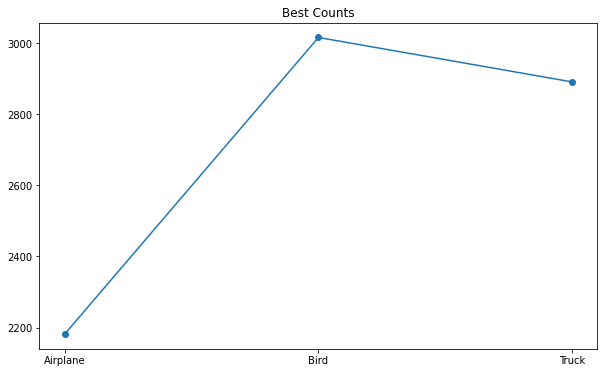

In [52]:
plt.figure(figsize=(10,6))
plt.plot(['Airplane','Bird','Truck'],max_counts,'-o')
plt.title('Best Counts')

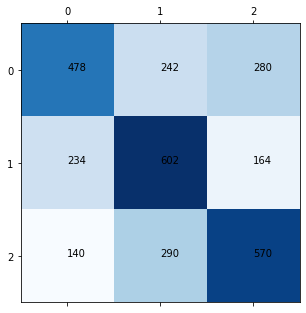

In [53]:
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))